In [55]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Merge all csv files

In [17]:
raw_data = pd.concat(
    map(pd.read_csv, ['./RawDataFiles/breastcancerdata1.csv', './RawDataFiles/breastcancerdata2.csv', 
                      './RawDataFiles/breastcancerdata3.csv']), ignore_index=True)

raw_data.head()

raw_data.to_csv("raw_data1.csv", index=False)

In [16]:
raw_data.shape

(1522340, 13)

### Add the new columns 

#### Data types of the columns

In [19]:
print(raw_data.dtypes)
raw_data.head()

year                        int64
age_group_ID                int64
ethinicity_ID               int64
first_degree_hx_ID          int64
age_menarche_ID             int64
age_first_birth_ID          int64
BIRADS_breast_density_ID    int64
current_hrt_ID              int64
menopaus_ID                 int64
bmi_group_ID                int64
biophx_ID                   int64
breast_cancer_history_ID    int64
count                       int64
dtype: object


,year,age_group_ID,ethinicity_ID,first_degree_hx_ID,age_menarche_ID,age_first_birth_ID,BIRADS_breast_density_ID,current_hrt_ID,menopaus_ID,bmi_group_ID,biophx_ID,breast_cancer_history_ID,count
0,2005,1,1,0,0,0,2,0,1,9,0,0,2
1,2005,1,1,0,0,0,4,0,1,1,0,0,1
2,2005,1,1,0,0,0,4,0,1,2,0,0,1
3,2005,1,1,0,0,0,4,0,1,9,0,0,2
4,2005,1,1,0,0,1,4,0,1,4,0,0,1


### Adding Menopaus column

In [21]:
def map_values(row, values_dict):
    return values_dict[row]

values_dict = {1: 'Pre- or peri-menopausal', 2: 'Post-menopausal', 3:'Surgical menopausal', 9:'Unknown'}

raw_data['menopaus'] = raw_data['menopaus_ID'].apply(map_values, args =(values_dict,))

### Adding age_group column

In [24]:
def map_values2(row, values_dict):
    return values_dict[row]

values_dict = {1: 'Age 18-29', 2: 'Age 30-34', 3:'Age 35-39', 4:'Age 40-44',
               5:'Age 45-49', 6:'Age 50-54', 7:'Age 55-59', 8:'Age 60-64', 9:'Age 65-69', 
               10:'Age 70-74',11:'Age 75-79', 12:'Age 80-84', 13:'Age >=85' }

raw_data['age_group'] = raw_data['age_group_ID'].apply(map_values2, args =(values_dict,))

### Adding ethnicity column

In [26]:
def map_values3(row, values_dict):
    return values_dict[row]

values_dict = {1: 'Non-Hispanic White', 2: 'Non-Hispanic Black', 3:'Asian/Pacific Islander', 4:'Native American',
               5:'Hispanic', 6:'Other/Mixed', 9:'Unknown'}

raw_data['ethinicity'] = raw_data['ethinicity_ID'].apply(map_values3, args =(values_dict,))

### Adding BMI column

In [28]:
def map_values4(row, values_dict):
    return values_dict[row]

values_dict = {1: '10-24.99', 2: '25-29.99', 3:'30-34.99',
               4:'35 or more', 9:'Unknown'}

raw_data['bmi_group'] = raw_data['bmi_group_ID'].apply(map_values4, args =(values_dict,))

### Adding Breast Cancer History Column

In [30]:
def map_values5(row, values_dict):
    return values_dict[row]

values_dict = {0: 'No', 1: 'Yes', 9:'Unknown'}

raw_data['breast_cancer_history'] = raw_data['breast_cancer_history_ID'].apply(map_values5, args =(values_dict,))

### Adding Age_first_birth column

In [32]:
def map_values6(row, values_dict):
    return values_dict[row]

values_dict = {0: 'Age < 20', 1: 'Age 20-24', 2:'Age 25-29', 3:'Age >=30',
               4:'Nulliparous', 9:'Unknown'}

raw_data['age_first_birth'] = raw_data['age_first_birth_ID'].apply(map_values6, args =(values_dict,))

### Adding age_menarche column

In [34]:
def map_values7(row, values_dict):
    return values_dict[row]

values_dict = {0: 'Age >=14', 1: 'Age 12-13', 2:'Age <12', 9:'Unknown'}

raw_data['age_menarche'] = raw_data['age_menarche_ID'].apply(map_values7, args =(values_dict,))

### Adding BIRAIDS_breast_density column

In [36]:
def map_values8(row, values_dict):
    return values_dict[row]

values_dict = {1: 'Almost entirely fat', 2: 'Scattered fibroglandular densities', 3:'Heterogeneously dense', 
               4:'Extremely dense',  9:'Unknown or different measurement system'}

raw_data['BIRADS_breast_density'] = raw_data['BIRADS_breast_density_ID'].apply(map_values8, args =(values_dict,))

### Adding biophx Column

In [39]:
def map_values9(row, values_dict):
    return values_dict[row]

values_dict = {0: 'No', 1: 'Yes', 9:'Unknown'}

raw_data['biophx'] = raw_data['biophx_ID'].apply(map_values9, args =(values_dict,))

### Adding current_hrt column

In [42]:
def map_values10(row, values_dict):
    return values_dict[row]

values_dict = {0: 'No', 1: 'Yes', 9:'Unknown'}

raw_data['current_hrt'] = raw_data['current_hrt_ID'].apply(map_values10, args =(values_dict,))

### Adding first_degree_hx

In [44]:
def map_values11(row, values_dict):
    return values_dict[row]

values_dict = {0: 'No', 1: 'Yes', 9:'Unknown'}

raw_data['first_degree_hx'] = raw_data['first_degree_hx_ID'].apply(map_values11, args =(values_dict,))

### Save new Raw Data File with new columns

In [46]:
raw_data.to_csv("raw_data_labels.csv", index=False)

### removing old columns

In [47]:
column_names = list(raw_data.columns.values)
print(column_names)

['year', 'age_group_ID', 'ethinicity_ID', 'first_degree_hx_ID', 'age_menarche_ID', 'age_first_birth_ID', 'BIRADS_breast_density_ID', 'current_hrt_ID', 'menopaus_ID', 'bmi_group_ID', 'biophx_ID', 'breast_cancer_history_ID', 'count', 'menopaus', 'age_group', 'ethinicity', 'bmi_group', 'breast_cancer_history', 'age_first_birth', 'age_menarche', 'BIRADS_breast_density', 'biophx', 'current_hrt', 'first_degree_hx']


In [48]:
new_raw_data = raw_data[['year', 'age_group', 'ethinicity', 'bmi_group', 'breast_cancer_history', 
                         'age_first_birth', 'age_menarche','menopaus','BIRADS_breast_density', 
                         'biophx', 'current_hrt', 'first_degree_hx','count']]

In [49]:
new_raw_data.head()

,year,age_group,ethinicity,bmi_group,breast_cancer_history,age_first_birth,age_menarche,menopaus,BIRADS_breast_density,biophx,current_hrt,first_degree_hx,count
0,2005,Age 18-29,Non-Hispanic White,Unknown,No,Age < 20,Age >=14,Pre- or peri-menopausal,Scattered fibroglandular densities,No,No,No,2
1,2005,Age 18-29,Non-Hispanic White,10-24.99,No,Age < 20,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,1
2,2005,Age 18-29,Non-Hispanic White,25-29.99,No,Age < 20,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,1
3,2005,Age 18-29,Non-Hispanic White,Unknown,No,Age < 20,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,2
4,2005,Age 18-29,Non-Hispanic White,35 or more,No,Age 20-24,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,1


### Save new CSV files without the old columns

In [50]:
new_raw_data.to_csv("new_raw_data.csv", index=False)

### Save CSV with first 500 rows 

In [54]:
# create new dataframe to use in sql server
df_new = new_raw_data.head(500)

#convert to CSV

df_new.to_csv("RawData500.csv", index=False)

### Reading CSV File for Analysis

In [56]:
df = pd.read_csv("new_raw_data.csv")

In [57]:
df.head()

,year,age_group,ethinicity,bmi_group,breast_cancer_history,age_first_birth,age_menarche,menopaus,BIRADS_breast_density,biophx,current_hrt,first_degree_hx,count
0,2005,Age 18-29,Non-Hispanic White,Unknown,No,Age < 20,Age >=14,Pre- or peri-menopausal,Scattered fibroglandular densities,No,No,No,2
1,2005,Age 18-29,Non-Hispanic White,10-24.99,No,Age < 20,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,1
2,2005,Age 18-29,Non-Hispanic White,25-29.99,No,Age < 20,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,1
3,2005,Age 18-29,Non-Hispanic White,Unknown,No,Age < 20,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,2
4,2005,Age 18-29,Non-Hispanic White,35 or more,No,Age 20-24,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,1


### Total Number of breast cancer cases by Ethnicity 

In [59]:
df['ethinicity'].value_counts().head()

Non-Hispanic White        721859
Non-Hispanic Black        255476
Asian/Pacific Islander    179926
Hispanic                  177069
Unknown                    98329
Name: ethinicity, dtype: int64

/Users/natacha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


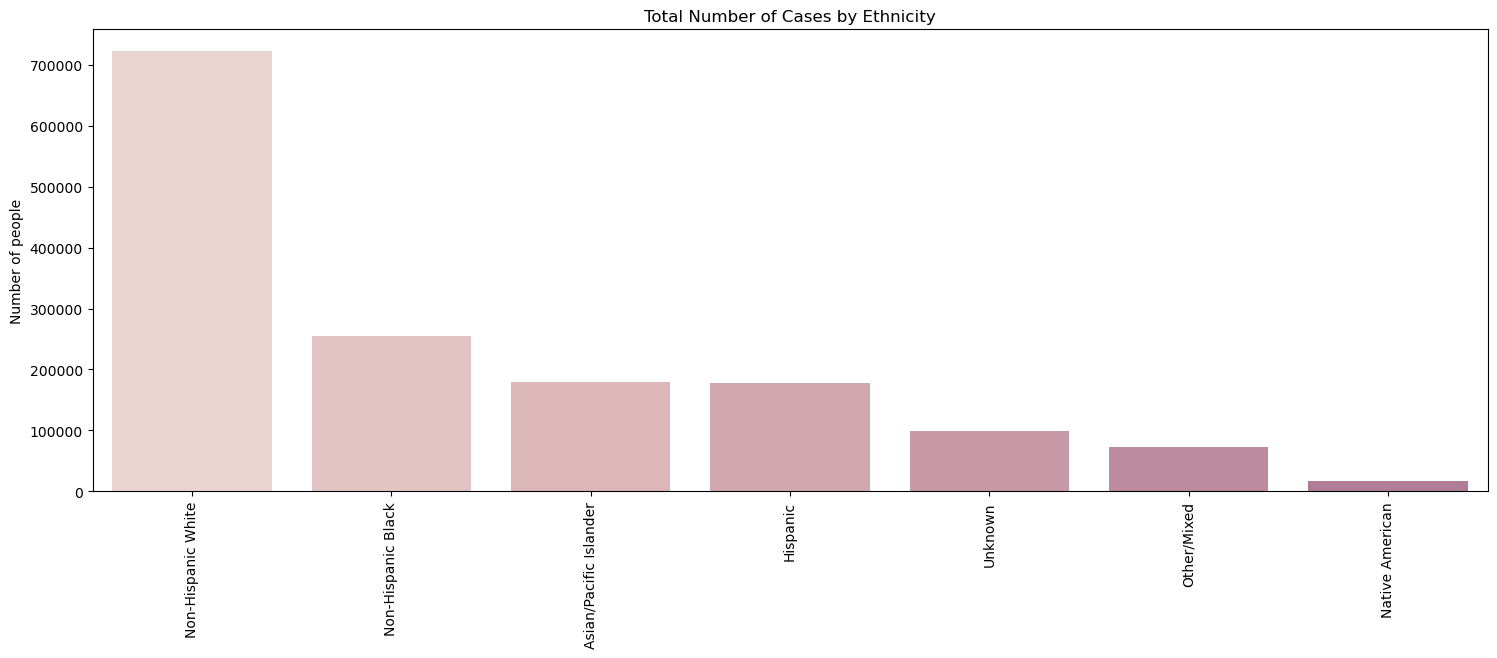

In [61]:
item_counts = df['ethinicity'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Number of people")
plt.title("Total Number of Cases by Ethnicity");
plt.xticks(rotation=90);


### Total Number of Cases by Age of Menarche

In [62]:
df['age_menarche'].value_counts().head()

Unknown      688431
Age 12-13    366212
Age >=14     256545
Age <12      211152
Name: age_menarche, dtype: int64

/Users/natacha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


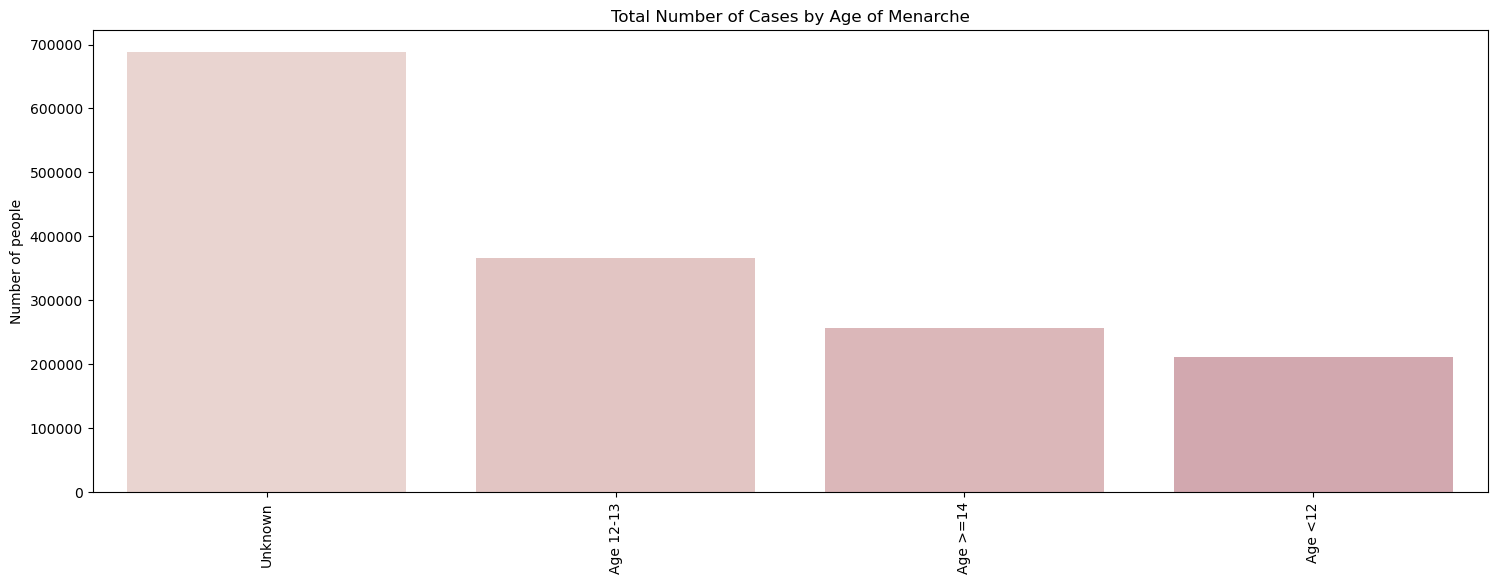

In [63]:
num_people = df['age_menarche'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18,6))
sns.barplot(num_people.index, num_people.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Number of people")
plt.title("Total Number of Cases by Age of Menarche");
plt.xticks(rotation=90);


### What is the most of common Age Group in the dataset that has breast cancer?

In [64]:
df['age_group'].value_counts().head()

Age 55-59    254196
Age 50-54    252910
Age 45-49    189193
Age 60-64    161787
Age 65-69    147137
Name: age_group, dtype: int64

/Users/natacha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


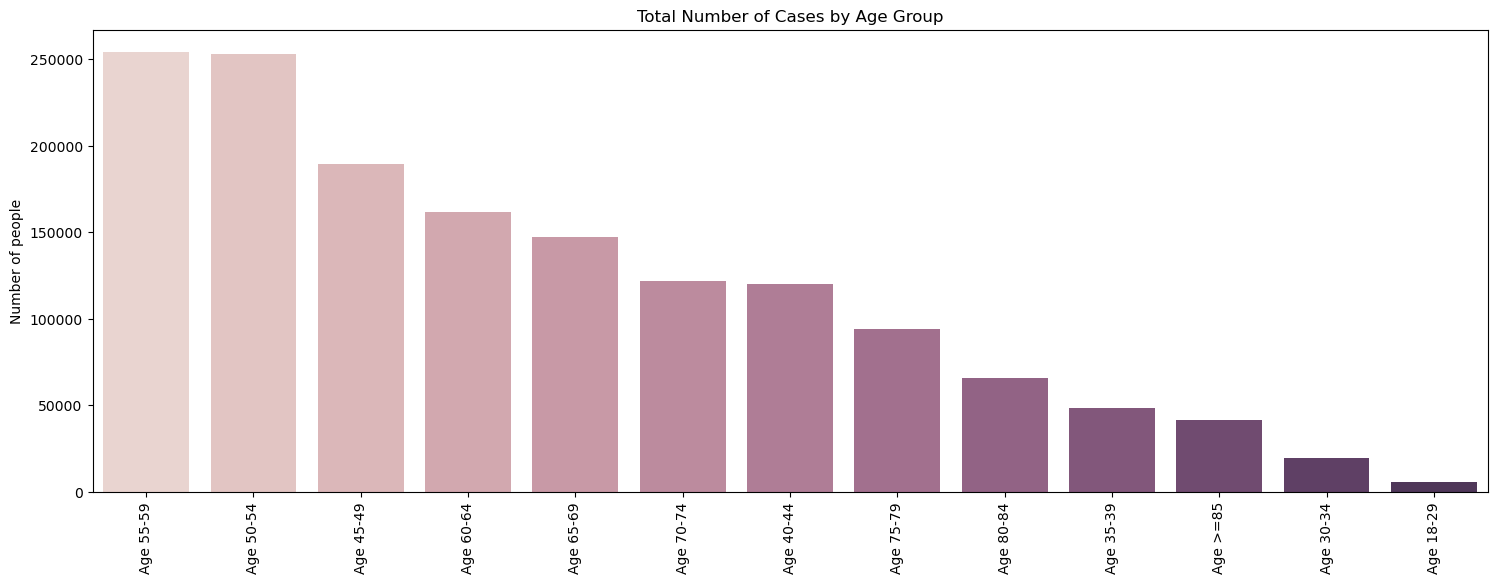

In [65]:
num_people = df['age_group'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18,6))
sns.barplot(num_people.index, num_people.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Number of people")
plt.title("Total Number of Cases by Age Group");
plt.xticks(rotation=90);

### Which ethnicity has the most breast cancer history in their family?

In [66]:
df.head()

,year,age_group,ethinicity,bmi_group,breast_cancer_history,age_first_birth,age_menarche,menopaus,BIRADS_breast_density,biophx,current_hrt,first_degree_hx,count
0,2005,Age 18-29,Non-Hispanic White,Unknown,No,Age < 20,Age >=14,Pre- or peri-menopausal,Scattered fibroglandular densities,No,No,No,2
1,2005,Age 18-29,Non-Hispanic White,10-24.99,No,Age < 20,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,1
2,2005,Age 18-29,Non-Hispanic White,25-29.99,No,Age < 20,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,1
3,2005,Age 18-29,Non-Hispanic White,Unknown,No,Age < 20,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,2
4,2005,Age 18-29,Non-Hispanic White,35 or more,No,Age 20-24,Age >=14,Pre- or peri-menopausal,Extremely dense,No,No,No,1


### Number of people with Breast Cancer History by Ethnicity

In [85]:
new = df.groupby(['ethinicity','first_degree_hx']).size().to_frame('size')
display(new)

size
ethinicity             first_degree_hx        
Asian/Pacific Islander No               131886
                       Unknown           11951
                       Yes               36089
Hispanic               No               134556
                       Unknown            8874
                       Yes               33639
Native American        No                12840
                       Unknown             629
                       Yes                3036
Non-Hispanic Black     No               177430
                       Unknown           10873
                       Yes               67173
Non-Hispanic White     No               444127
                       Unknown           42342
                       Yes              235390
Other/Mixed            No                53885
                       Unknown            3870
                       Yes               15421
Unknown                No                66853
                       Unknown            9691
                       Yes               21785

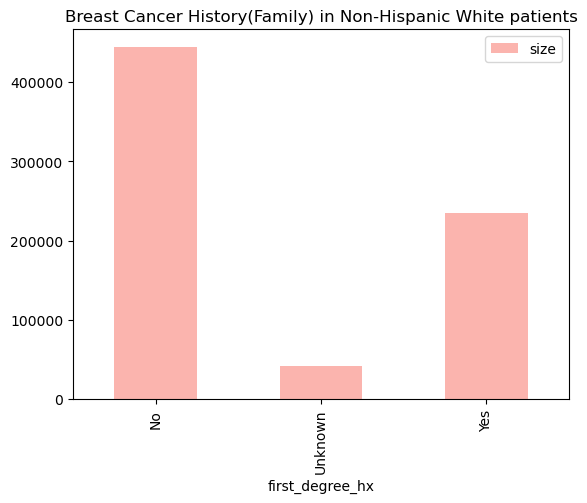

In [86]:
s = new.xs('Non-Hispanic White')
p1 = s.plot(kind='bar', colormap='Pastel1', title='Breast Cancer History(Family) in Non-Hispanic White patients')

In [ ]:
s = new.xs('Asian/Pacific Islander')
p1 = s.plot(kind='bar', colormap='Pastel1', title='Breast Cancer History in Asian/Pacific Islander patients')

In [87]:
new_raw_data.shape

(1522340, 13)